In [ ]:
# Bibliotecas
   
import numpy as np # vectores, matrices grandes y multidimensionales, y funciones para estas

# Para graficar
%matplotlib inline
import matplotlib.pyplot as plt

#Bibliotecas generales
import torch
import torchvision
import torchvision.transforms as transforms # transformaciones generales
from torchvision import datasets

# Redes neuronales
import torch.nn as nn
import torch.nn.functional as F


# Pérdida y optimización
import torch.optim as optim

import os
import random


# Describa el problema y el objetivo del ejercicio


El problema a resolver consiste en la clasificación de animales utilizando redes neuronales convolucionales (CNN) desarrollando un modelo que pueda reconocer y clasificar imágenes de animales de diferentes clases.

El objetivo consiste en resolver el problema mediante el uso de un conjunto de imágenes con la categoría correspondiente para entrenar la red, de modo que el modelo pueda aprender a reconocer las características únicas de cada animal y pueda clasificar correctamente las imágenes.

https://www.kaggle.com/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals/code



In [ ]:
import os
os.chdir("/content/drive/")
!ls

MyDrive


# Describa los datos utilizados en el ejercicio

Los datos nos van a permitir analizar una recopilacion de los animales conseguido de la plataforma KLaggle, este dataset consta de 2 subfolders, en donde se encuentran 4 classes, cada uno corresponde a un animal diferente, y dentro de este, se encuentra una selecciona amplia de imagenes. La cantidad de imagenes en total de todos los animales corresponde a 240.

# Cargue, normalice y explore los datos

In [66]:
from os import listdir

data_dir_training = '/content/drive/MyDrive/IA2023/Dataset/train/animals'
data_dir_test = '/content/drive/MyDrive/IA2023/Dataset/test/animals'

transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor()])

datasetTraining = datasets.ImageFolder(data_dir_training, transform=transform)

trainloader = torch.utils.data.DataLoader(datasetTraining, batch_size=4,
                                          shuffle=True, num_workers=2)

datasetTest = datasets.ImageFolder(data_dir_test, transform=transform)

testloader = torch.utils.data.DataLoader(datasetTest, batch_size=4,
                                         shuffle=True, num_workers=2)


# Clases a utilizar para procesar las imágenes.
# Preparamos una lista con todas las clases de animales
classes = listdir(data_dir_training)
print(len(classes))
print(classes)

4
['fly', 'goldfish', 'goat', 'fox']


In [27]:
print(datasetTest)

Dataset ImageFolder
    Number of datapoints: 240
    Root location: /content/drive/MyDrive/IA2023/Dataset/test/animals
    StandardTransform
Transform: Compose(
               Resize(size=255, interpolation=bilinear, max_size=None, antialias=warn)
               CenterCrop(size=(224, 224))
               ToTensor()
           )


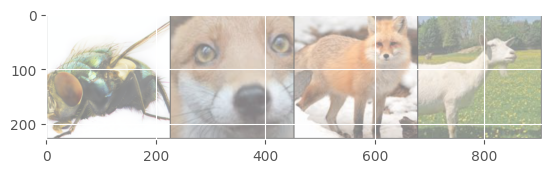

  fly goldfish goldfish  goat
torch.Size([3, 228, 906])


In [28]:
def imshow(img):
    img = img / 2 + 0.5   
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Se obtienen imágenes del conjunto de entrenamiento al azar
for images, labels in trainloader:
    # Show the images
    imshow(torchvision.utils.make_grid(images))
    
# Se muestran las respectivas etiquetas
    print(' '.join('%5s' % classes[labels[j]] for j in range(4)))
    
   
    print(torchvision.utils.make_grid(images).shape)
    
    break

# Calcule algunas estadísticas importantes, por ejemplo cantidad de registros por clase para verificar si las clases están balanceadas.

In [74]:
subfolders = {}

for root, dirs, files in os.walk(data_dir_training):
    # loop through all subdirectories in the given directory
    for name in dirs:
        subdirectory_path = os.path.join(root, name)
        content_count = len(os.listdir(subdirectory_path))
        subfolders[name] = content_count

for name, count in subfolders.items():
    print(f"Clase: {name}, Cantidad {count}")



Clase: fly, Cantidad 60
Clase: goldfish, Cantidad 60
Clase: goat, Cantidad 60
Clase: fox, Cantidad 60


# Defina la red convolucional.

In [48]:
#Se crea el modelo para el aprendizaje con la clase module

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()

        
        self.conv1 = nn.Conv2d(3, 6, 5)

        
        self.pool = nn.MaxPool2d(2, 2)  

      
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        #Capas perceptrón del modelo
        self.fc1 = nn.Linear(16*53*53, 120)
        self.fc2 = nn.Linear(120, 84)
        
        #Salida para 2 clases 
        self.fc3 = nn.Linear(84, 9)

    def forward(self, x):
        # Implementa la función de activación y realiza el pase hacia adelante de la red
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*53*53)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

# Defina los hiper-parámetros de entrenamiento, por ejemplo, función de perdida, el optimizador, entre otros.

In [49]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Separe las muestras en datos de entrenamiento y validación y entrene el modelo.

In [50]:
# cantidad de ciclos de entrenamiento 
numEpoch = 2

for epoch in range(numEpoch):  
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        
        # obtener los datos de entrada; 
        # data es una lista de la forma [inputs, labels]
        inputs, labels = data 

        # inicializar los parámetros del gradiente.
        optimizer.zero_grad()

        # Se realizan las predicciones con el modelo. 
        # Este código ejecuta el forward de las entradas.
        outputs = net(inputs)
        
        # Se calcula la pérdida utilizando Cross Entropy Loss
        loss = criterion(outputs, labels)       
        loss.backward()
        
        #El optimizador realiza las actualizaciones a través del método step().
        optimizer.step()

        # imprimir estadisticas
        running_loss += loss.item()
        #print(i)
        if i % 1000 == 999:    # imprimir mensaje cada 1000 mini-batches
            print('[%d, %5d] pérdida: %.3f' %
                  (epoch + 1, i + 1, running_loss / 1000))
            running_loss = 0.0

print('Fin del entrenamiento')

Fin del entrenamiento


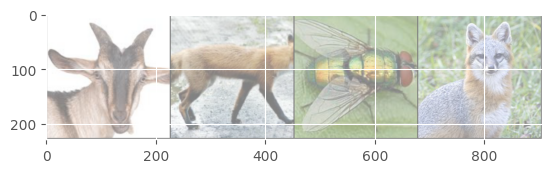

Etiqueta verdadera:   goat goldfish   fly goldfish


In [52]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# imprimir algunos ejemplos y la etiqueta original 
imshow(torchvision.utils.make_grid(images))
print('Etiqueta verdadera: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))


In [53]:
_, predicted = torch.max(outputs, 1)

print('Predicción: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicción:    fox   fox   fox   fox


# Calcule la exactitud del modelo resultante (porcentaje de muestras clasificadas apropiadamente). 

In [54]:
#Cantidad de imágenes clasificadas correctamente.
correct = 0
total = 0

all_labels = []
all_predictions = []
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        all_predictions+=predicted
        all_labels+=labels
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Exactitud de la red en las imágenes de prueba: %d %%' % (
    100 * correct / total))

Exactitud de la red en las imágenes de prueba: 25 %


# Analice los resultados, proponga mejoras y explique los cambios realizados al flujo de trabajo del proyecto para mejorar el rendimiento de la red (aplique al menos dos cambios que mejoren el rendimiento).


Los resultados no eran los esperados, se esperaba que la red fuera mas precisa pero cabe destacar que se utilizo un grupo de datos muy pequeno, esto debido a que el rendimiento de la maquina para el entrenamieto no era el mas apto, por lo que por temas de tiempo, se tuvo que acudir a reducir la cantidad de epocas y cantidad de datos de animales.

Dos cambios que puedan ayudar a mejorar el rendimiento pueden ser una eleccion mas amplia de los hiperparametros, esto ya que le puede ayudar a la red a elegir o seguir un numero de "filtros" para intentar acertar con lo buscado.

Otro cambio consiste en el tema del conjunto de datos, no solo tener una gran seleccion, sino que este conjunto de datos posea imagenes claras y que no tengan basura, para que asi la red aprenda de los patrones.

# Presente al menos cuatro conclusiones.

# Conclusiones


1. La cantidad de epocas afecta la manera de aprendizaje, se probó con un 10 epocas pero el programa tardaba mucho y no generaba mayores resultados. Luego se probo con un numero mas pequeño de epocas como lo es 2 y se mantiene aproximadamente en el mismo porcentaje de aciertos. Creemos que un numero de epocas como 5 podria ser beneficioso para el programa.

2. Esta clase de ejecicios toman mucho tiempo de ejecucion para un dataset tan grande como el implementado para este programa, por lo que se realizo con 4 animales. Se recomienda buscar algun tipo de optimizacion para agilizar el proceso de pruebas.

3. Comparando este ejercicio con el realizado en clase podemos notar que con un dataset mas pequeño es un poco mas acertado para nuestro caso, al probar ahora con un conjunto de datos tan grande provoca un poco de confusion al entrenar y genera muchos errores.

4. Es necesario investigar mas a fondo para comprender como afecta la cantidad de epocas de entrenamiento al rendimiento del programa, para nosotros como estudiantes es complicado probar uno por uno para demostrar cual da un mejor resultado, ya que al tener tantas categorías en las que se pueden clasificar las imágenes, la correcta clasificación de las imágenes se complicación un poco, debido a que los animales (en este caso), pueden llegar a tener patrones muy parecidos.

# Referencias

Géron, A. (2019). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow: Concepts, tools, and techniques to build intelligent systems (2nd ed.). O'Reilly Media.

Brownlee, J. (2021). How to Develop Convolutional Neural Networks with Python and Keras. Machine Learning Mastery. https://machinelearningmastery.com/how-to-develop-convolutional-neural-networks-for-multi-step-time-series-forecasting/

PyTorch. (n.d.). Tutorials. https://pytorch.org/tutorials/

Calderón, S. (2023). Referencia-RedesNeuronales.pdf. Recuperado de https://tecdigital.tec.ac.cr/dotlrn/classes/CA/IC6200/S-1-2023.AL.IC6200.20/file-storage/view/clases%2Fsemana09-10-perceptr-n-y-redes-convolucionales%2FReferencia-RedesNeuronales.pdf

CNN_v3.ipynb [Archivo Jupyter Notebook]. Recuperado de https://tecdigital.tec.ac.cr/dotlrn/classes/CA/IC6200/S-1-2023.AL.IC6200.20/file-storage/view/clases%2Fsemana09-10-perceptr-n-y-redes-convolucionales%2FCNN_v3.ipynb
